In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 3:  Interpolation

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** (20 points) Analytically find the interpolating polynomial $P(x)$ in the basis
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Newton: $P(x) = \sum^2_{i=0} a_i n_i(x)$

### Solution:

(1)For Monomial, $P(x) = p_0 + p_1 x + p_2 x^2$ leading to the equations

$$P_2(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 = y_0$$

$$P_2(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 = y_1$$

$$P_2(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 = y_2$$

Define the *Vandermonde* matrix as

$$
V = \begin{bmatrix} 
     1 & x_0 & x_0^2 \\
     1 & x_1 & x_1^2 \\
     1 & x_2 & x_2^2 
\end{bmatrix}
$$

which allows us to write the system of linear equations

$$\begin{bmatrix} 
     1 & x_0 & x_0^2 \\
     1 & x_1 & x_1^2 \\
     1 & x_2 & x_2^2
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \end{bmatrix}$$

we can obtain:
$$\begin{bmatrix} 
     1 & 0 & 0 \\
     1 & 1 & 1 \\
     1 & 2 & 4
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 2 \\ 2 \end{bmatrix}$$

thourgh compute, we get
$$\begin{bmatrix} p_0 \\ p_1 \\ p_2 \end{bmatrix} = 
\begin{bmatrix} 
     1 & 0 & 0 \\
     1 & 1 & 1 \\
     1 & 2 & 4
\end{bmatrix}^ { -1 } \begin{bmatrix} 0 \\ 2 \\ 2 \end{bmatrix} = 
\begin{bmatrix} 
     1 & 0 & 0 \\
     -1.5 & 2 & -0.5 \\
     0.5 & -1 & 0.5
\end{bmatrix} \begin{bmatrix} 0 \\ 2 \\ 2 \end{bmatrix} = 
\begin{bmatrix} 0 \\ 3 \\ -1 \end{bmatrix}
$$

Therefore,
$$P(x) = 0 + 3x + (-1) x^2 \\ = 3x - x^2$$

(2)For Newton, $P(x) = \sum^2_{i=0} a_i n_i(x) = a_0 n_0(x) + a_1 n_1(x) + a_2 n_2(x)$

Then $P(x)$ can be written in Newton's form as

$$P(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2]\\= y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right )$$



$$= 0 + (x-0) \frac{2-0}{1-0} + (x-0)(x-1) \left (\frac{2-2}{(2-1)(2-0)} - \frac{2-0}{(1-0)(2-0)} \right)$$

$$=2x + (x)(x-1)(-1) \\ = 3x -x^2$$

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(b)** (10 points) Show that these all lead to the same polynomial (show that $P(x)$ is in fact unique).

### Solution
We can get from the (a) that:

For monomial,
$P(x)  = 3x - x^2$

For Newton,
$P(x)  = 3x - x^2$

Therefore, these all lead to the same polynomial.


**(c)** (10 points) Use the uniqueness of the interpolating polynomial to show that for general $N+1$ points

$$\sum^N_{i=0} \ell_i(x) = 1$$

at any value of $x$ (i.e. the interpolant of a constant is a constant regardless of $N$).

Hint:  Consider the Newton polynomial form and uniqueness.

### Solution
For langradi basis
where 

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

Note that $\ell_i(x_i) = 1$ and $\forall j\neq i, ~~ \ell_i(x_j) = 0$.

## Question 2

(10 points) The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$w(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} a & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).

### Solution

Let $x=cos(\theta)$, we can get $T_n(x) = \cos (n \theta)$
$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \int^ \pi _{0}  \cos (n \theta) \cos (m \theta) d \theta $$

We can get:
$$\frac{1}{2} \int^ \pi _{0}  \cos ((m-n) \theta) + \cos ((m+n) \theta) d \theta = \left \{ \begin{aligned} \frac{\pi}{2} & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right.$$

## Question 3

(10 points) For N = 4 find the maximum value and its location of $|\ell_2(x)|$ for equispaced points on $[-1, 1]$.

For Lagrange basis
where 

$$\ell_2(x) = \prod^{4}_{j=0, j \neq 2} \frac{x - x_j}{x_2 - x_j} = \frac{x - x_0}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1}\frac{x - x_{3}}{x_2 - x_{3}}\frac{x - x_{4}}{x_2 - x_{4}}$$

Note that $\ell_i(x_i) = 1$ and $\forall j\neq i, ~~ \ell_i(x_j) = 0$.

$x_{0} = -1,  x_{1} = -0.5,x_{2} = 0,x_{3} = 0.5,x_{4} = 1$

$$\ell_2(x) =(x+1)(2x+1)(-2x+1)(-x+1) ＝ 4 x^4-5 x^2+1$$

$ \ell_2'(x) =16x^3 - 10x = x(16x^2-10)$

So, when $x = 0$,$\frac{\sqrt10}{4}$,$-\frac{\sqrt10}{4}$     $\ell_2'(x) = 0$ 

When $x = 0$, $\ell_2(x)$ become maximum 1;



## Question 4

Consider the Lebesgue function
$$
\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x)\big{|}
$$
where $\ell_i(x)$ are Lagrange basis functions for a given set of $x_i$.  The maximum of the Lebesgue function is called $\Lambda_n$ the Lebesgue constant and are clearly related to Lagrangian interpolation as they provide a first estimate for the interpolation error.  Unfortunately, $\Lambda_N$ is not uniformly bounded regardless of the nodes used as one can show that 
$$
    \Lambda_N > \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty
$$

Note, $\Lambda_n$ is the infinite-norm of the linear operator mapping data to interpolant on the given grid and interval.

**(a)** (5 points) What do you expect the Lebesgue function to look like?  Are there key points where we will know the function value exactly?

Polynonimal -1,1

**(b)** (10 points) Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = -1 + \frac{2 i}{N}, ~~~ i = 0, 1, \ldots, N.
$$
For the case where $N = 20$ comment on what you see (you may need to use `semilogy` to see the results).

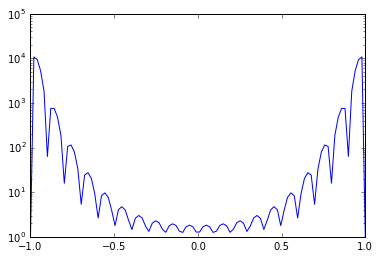

In [2]:
### INSERT CODE HERE
N = 20
data = []
for k in xrange(N + 1):
    data = data + [-1+2.*k/N] 

x = numpy.linspace(-1, 1, 100)
lagrange_basis = numpy.ones((N + 1, numpy.size(x)))


for i in xrange(N + 1):
    for j in xrange(N + 1):
        if i != j:
            lagrange_basis[i,:] *= (x - data[j]) / (data[i] - data[j])

Lebesgue = numpy.zeros(numpy.size(x))
for n in xrange(N + 1):
    Lebesgue += numpy.abs(lagrange_basis[n,:])


plt.semilogy(x,Lebesgue)

**(c)** (10 points) Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = \cos\left( \frac{(2i - 1) \pi}{2 N} \right ) ~~~ i = 1, \ldots, N + 1.
$$
Again comment on what you see in the case $N = 20$.

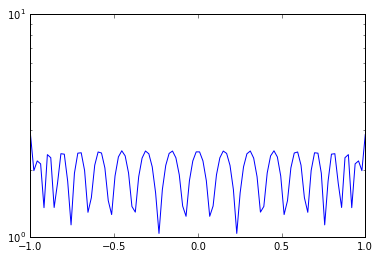

In [5]:
### INSERT CODE HERE
import math
N = 20
data = []
for k in xrange(N + 1):
    #data = data + [-1+2.*k/N] 
    num = (2.0*(k+1)-1.0)*numpy.pi
    den =  2.0*N
    xi = numpy.cos(num/den)
    data = data + [xi]
x = numpy.linspace(-1, 1, 100)
#lagrange_basis = numpy.ones((N + 1, numpy.size(x)))
lagrange_basis = numpy.ones((N + 1, x.shape[0]))

for i in xrange(N):
    for j in xrange(N):
        if i != j:
            lagrange_basis[i,:] *= (x - data[j]) / (data[i] - data[j])
#Lebesgue = numpy.zeros(numpy.size(x))
Lebesgue = numpy.zeros(x.shape[0])
for n in xrange(N):
    Lebesgue += numpy.abs(lagrange_basis[n,:])

plt.semilogy(x,Lebesgue)

**(d)** (5 points) What do you observe about the Lebesgue function for each of the distribution of points?

**(e)** (10 points) Using suitable values for $N$ plot the Lebesgue constants of each of the above cases.  Make sure to use a suitably large number of points to evaluate the function at.  Graphically demonstrate that the constant grow with the predicted growth rate $\mathcal{O}(\log N)$.  Describe what you observe.